In [16]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Load the data

In [17]:
lines = open('ex1data1.txt', 'r')
xCoords = []
yCoords = []
for line in lines:
    x,y = line.strip('\n').split(',')
    xCoords.append(float(x))
    yCoords.append(float(y))
    
m = len(xCoords) # number of points

## Plot the data

Create a function to plot the data. Include also the the axis labels

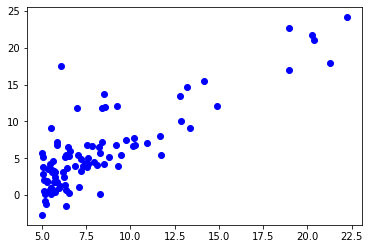

In [18]:
plt.plot(xCoords, yCoords, 'ob')

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


### Define a function to compute the Cost function
You will have to compute the function h first: $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$
and then compute the cost function. Keep in mind that the $$\theta$$ parameters are arbitrary and will be updated at each run. So your cost function should take X, y

In [38]:
def costFunction(xCoords, yCoords, theta0, theta1):
    ''' Will return the amount of error '''
    
    predictions = [(theta1 * xCoord + theta0) for xCoord in xCoords]
    totalError = 0
    m = len(xCoords)
    print(predictions)
    for i in range(len(yCoords)):
        totalError += 1/(2 * m) * (predictions[i]-yCoords[i])**2
        
       
    return totalError

In [39]:
costFunction(xCoords, yCoords, 1, 1)
print(xCoords)

[7.1101, 6.5277, 9.5186, 8.0032, 6.8598, 9.3829, 8.4764, 9.5781, 7.4862, 6.0546, 6.7107, 15.164, 6.734, 9.4084, 6.6407, 6.3794, 7.3654, 6.1301, 7.4296, 8.0708, 7.1891, 21.27, 6.4901, 7.3261, 6.5649, 19.945, 13.828, 11.957, 14.176, 23.203, 6.2524, 7.5894, 10.2482, 6.8918, 9.2111, 8.933399999999999, 9.0959, 6.6063, 13.836, 7.3534, 6.4069, 7.8825, 12.708, 6.7737, 8.8247, 8.0931, 6.0702, 6.8014, 12.7, 6.5416, 8.540199999999999, 6.3077, 8.4239, 8.603100000000001, 7.3328, 7.3589, 7.2742, 6.6397, 10.3102, 10.4536, 9.8254, 6.1793, 22.279, 15.908, 19.959, 8.2182, 9.2951, 11.236, 6.4994, 21.341, 11.136, 8.3345, 7.0062, 8.2259, 6.0269, 7.5479, 8.538599999999999, 6.0365, 11.274, 6.1077, 6.7292, 6.1884, 7.3557, 10.7687, 7.5159, 9.5172, 10.1802, 7.002, 6.5204, 6.0594, 6.7077, 8.6366, 6.8707, 6.3054, 9.2934, 14.394, 6.4369]
[6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.49

### Define a function to compute the gradient descent

In [28]:
def gradientDescent(xCoords, yCoords, theta0, theta1, epoch):
    ''' Will find the line of best fit '''
    
    errors = []
    
    m = len(xCoords)
    
    # Learning Rate
    a = 0.05
    
    # Epoch
    for e in range(epoch):
        
        for j in range(m):
        
            theta0 = theta0 - a / m * (theta1 * xCoords[j] + theta0 - yCoords[j]) * xCoords[j]
            theta1 = theta1 - a / m * (theta1 * xCoords[j] + theta0 - yCoords[j]) * xCoords[j]

        errors.append(costFunction(xCoords, yCoords, theta0, theta1))
        
    return errors

In [31]:
theta0 = 0
theta1 = 0
epoch = 500

errors = gradientDescent(xCoords, yCoords, theta0, theta1, epoch)
print(errors)

[7.521104411734502, 7.448789394522965, 7.45022759334335, 7.452320093953796, 7.454420510361126, 7.456523024609315, 7.4586275863214295, 7.460734197061574, 7.462842858863621, 7.464953573767715, 7.467066343816084, 7.469181171053019, 7.471298057524857, 7.473417005279998, 7.475538016368904, 7.477661092844099, 7.479786236760172, 7.481913450173778, 7.484042735143641, 7.4861740937305585, 7.488307527997393, 7.4904430400090956, 7.492580631832697, 7.494720305537271, 7.4968620631940235, 7.499005906876209, 7.501151838659184, 7.503299860620393, 7.505449974839349, 7.5076021833977, 7.509756488379141, 7.511912891869492, 7.514071395956667, 7.516232002730661, 7.5183947142836205, 7.520559532709746, 7.5227264601053525, 7.524895498568894, 7.527066650200919, 7.529239917104073, 7.531415301383149, 7.533592805145019, 7.53577243049871, 7.537954179555362, 7.540138054428223, 7.5423240572326895, 7.544512190086264, 7.546702455108601, 7.548894854421472, 7.55108939014879, 7.553286064416607, 7.555484879353112, 7.5576858